#Когортный анализ клиентов за 2016 - 2018 год

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import datetime
import math
matplotlib.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('drive/MyDrive/dataset/cohort_analysis.csv', sep=';', parse_dates=['date'], dayfirst=True)

In [3]:
df.sort_values(by=['user_id','date'], inplace = True)

In [4]:
print(df.head(5))
print('-------------')
print(df.info())

             date    promo    site    user_id  transaction_id  amount
112    2016-03-02  акция 6  сайт 3     u10010             114     600
1557   2016-06-07  акция 1  сайт 3    u100100            1559     200
8199   2017-05-31  акция 2  сайт 5    u100100            8201     900
999220 2018-11-16  акция 2  сайт 5    u100100          999222     700
34012  2017-01-22  акция 3  сайт 5  u10010000           34014     600
-------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 112 to 171662
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1048575 non-null  datetime64[ns]
 1   promo           1048575 non-null  object        
 2   site            1048575 non-null  object        
 3   user_id         1048575 non-null  object        
 4   transaction_id  1048575 non-null  int64         
 5   amount          1048575 non-null  int64         
dtypes: datetime64[ns

In [5]:
df_first_date_transaction = df.groupby('user_id')['date'].min().reset_index()
df_first_date_transaction.columns =['user_id','first_date']
df_first_date_transaction['first_month'] = df_first_date_transaction['first_date'].astype('datetime64[M]')

In [6]:
df_first_date_transaction.head(3)

,user_id,first_date,first_month
0,u10010,2016-03-02,2016-03-01
1,u100100,2016-06-07,2016-06-01
2,u10010000,2017-01-22,2017-01-01


In [7]:
df = df.merge(df_first_date_transaction, on='user_id')

In [8]:
df.head()

,date,promo,site,user_id,transaction_id,amount,first_date,first_month
0,2016-03-02,акция 6,сайт 3,u10010,114,600,2016-03-02,2016-03-01
1,2016-06-07,акция 1,сайт 3,u100100,1559,200,2016-06-07,2016-06-01
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-06-07,2016-06-01
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-06-07,2016-06-01
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,2017-01-01


In [9]:
df_cohorts = df[['user_id','date','first_date','first_month','amount']].copy()

In [10]:
df_cohorts.head(7)

,user_id,date,first_date,first_month,amount
0,u10010,2016-03-02,2016-03-02,2016-03-01,600
1,u100100,2016-06-07,2016-06-07,2016-06-01,200
2,u100100,2017-05-31,2016-06-07,2016-06-01,900
3,u100100,2018-11-16,2016-06-07,2016-06-01,700
4,u10010000,2017-01-22,2017-01-22,2017-01-01,600
5,u1001000001,2016-05-21,2016-05-21,2016-05-01,400
6,u1001000001,2017-06-26,2016-05-21,2016-05-01,200


In [11]:
df_cohorts['delta_days'] = df_cohorts['date'] - df_cohorts['first_date']

In [12]:
df_cohorts.head(7)

,user_id,date,first_date,first_month,amount,delta_days
0,u10010,2016-03-02,2016-03-02,2016-03-01,600,0 days
1,u100100,2016-06-07,2016-06-07,2016-06-01,200,0 days
2,u100100,2017-05-31,2016-06-07,2016-06-01,900,358 days
3,u100100,2018-11-16,2016-06-07,2016-06-01,700,892 days
4,u10010000,2017-01-22,2017-01-22,2017-01-01,600,0 days
5,u1001000001,2016-05-21,2016-05-21,2016-05-01,400,0 days
6,u1001000001,2017-06-26,2016-05-21,2016-05-01,200,401 days


In [13]:
df_cohorts['cohort'] = df_cohorts['delta_days']/np.timedelta64(1, 'M')
df_cohorts['cohort'] = df_cohorts['cohort'].apply(lambda x: math.ceil(x))

In [14]:
df_cohorts.head(10)

,user_id,date,first_date,first_month,amount,delta_days,cohort
0,u10010,2016-03-02,2016-03-02,2016-03-01,600,0 days,0
1,u100100,2016-06-07,2016-06-07,2016-06-01,200,0 days,0
2,u100100,2017-05-31,2016-06-07,2016-06-01,900,358 days,12
3,u100100,2018-11-16,2016-06-07,2016-06-01,700,892 days,30
4,u10010000,2017-01-22,2017-01-22,2017-01-01,600,0 days,0
5,u1001000001,2016-05-21,2016-05-21,2016-05-01,400,0 days,0
6,u1001000001,2017-06-26,2016-05-21,2016-05-01,200,401 days,14
7,u1001000002,2017-09-14,2017-09-14,2017-09-01,200,0 days,0
8,u10010000028,2018-08-03,2018-08-03,2018-08-01,800,0 days,0
9,u1001000005,2017-06-23,2017-06-23,2017-06-01,500,0 days,0


In [15]:
df_cohorts_group = df_cohorts.groupby(['first_month', 'cohort']).agg({'user_id':'nunique'}).reset_index()
df_cohorts_group.columns = ['first_month', 'cohort', 'cnt_users']

In [16]:
df_cohorts_group.head(5)

,first_month,cohort,cnt_users
0,2016-01-01,0,11648
1,2016-01-01,1,131
2,2016-01-01,2,123
3,2016-01-01,3,129
4,2016-01-01,4,143


In [17]:
df_cohorts_group['churn_rate'] = df_cohorts_group.groupby('first_month')['cnt_users'].pct_change()

In [18]:
df_cohorts_group.head(10)

,first_month,cohort,cnt_users,churn_rate
0,2016-01-01,0,11648,NaN
1,2016-01-01,1,131,-0.988753
2,2016-01-01,2,123,-0.061069
3,2016-01-01,3,129,0.048780
4,2016-01-01,4,143,0.108527
5,2016-01-01,5,136,-0.048951
6,2016-01-01,6,129,-0.051471
7,2016-01-01,7,131,0.015504
8,2016-01-01,8,131,0.000000
9,2016-01-01,9,145,0.106870


In [19]:
df_cohorts_group_ = df_cohorts_group.groupby('first_month').first('cnt_users').reset_index()
df_cohorts_group_.drop(['cohort', 'churn_rate'], axis=1, inplace=True)

In [20]:
df_cohorts_group_.columns = ['first_month','cnt_users_start']

In [21]:
df_cohorts_group_.head()

,first_month,cnt_users_start
0,2016-01-01,11648
1,2016-02-01,10895
2,2016-03-01,11308
3,2016-04-01,10997
4,2016-05-01,11082


In [22]:
df_result = df_cohorts_group.merge(df_cohorts_group_,on='first_month')

In [23]:
df_result.head(5)

,first_month,cohort,cnt_users,churn_rate,cnt_users_start
0,2016-01-01,0,11648,NaN,11648
1,2016-01-01,1,131,-0.988753,11648
2,2016-01-01,2,123,-0.061069,11648
3,2016-01-01,3,129,0.048780,11648
4,2016-01-01,4,143,0.108527,11648


In [24]:
df_result['retention_rate'] = df_result['cnt_users']/df_result['cnt_users_start']

In [25]:
df_result.head(5)

,first_month,cohort,cnt_users,churn_rate,cnt_users_start,retention_rate
0,2016-01-01,0,11648,NaN,11648,1.000000
1,2016-01-01,1,131,-0.988753,11648,0.011247
2,2016-01-01,2,123,-0.061069,11648,0.010560
3,2016-01-01,3,129,0.048780,11648,0.011075
4,2016-01-01,4,143,0.108527,11648,0.012277


In [26]:
pivot_retention = df_result.pivot_table(index='first_month', columns = 'cohort', values='retention_rate')\
.fillna(0).drop(columns = 0)

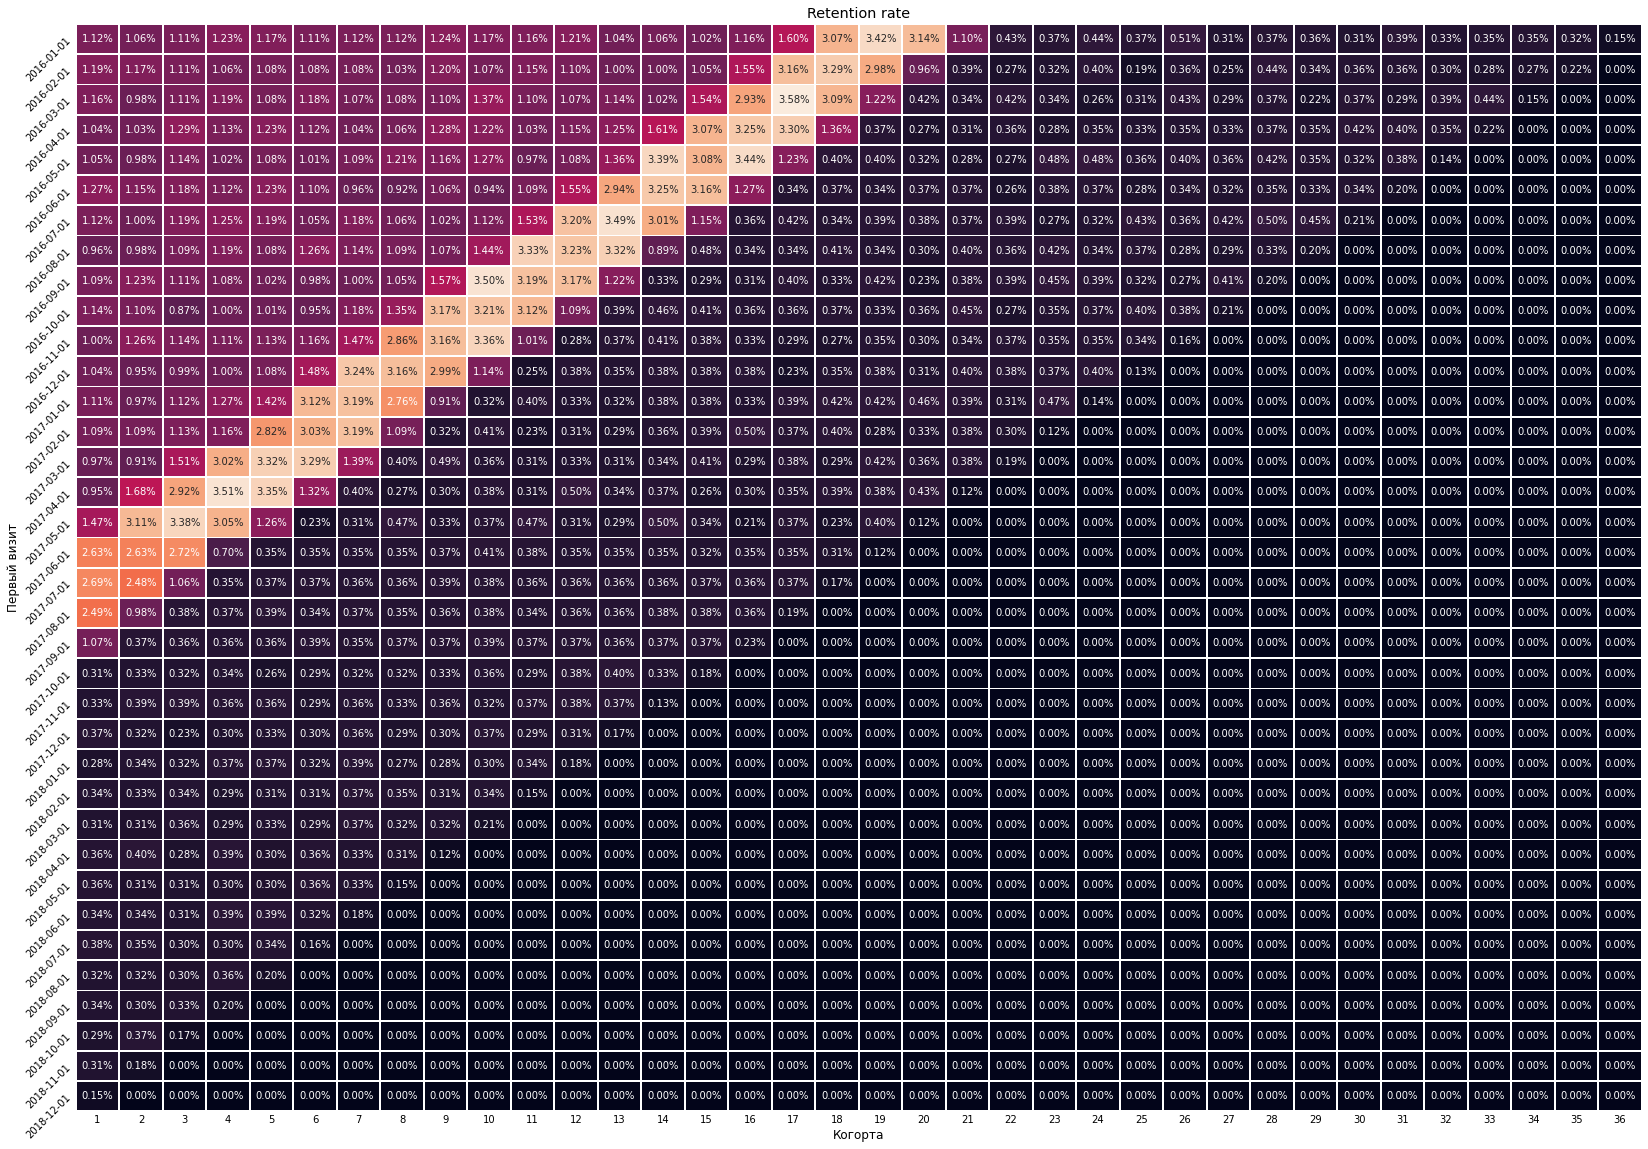

In [27]:
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(pivot_retention, annot=True, linewidths=1, fmt='.2%', cbar=False)
ax.set_xlabel('Когорта')
ax.set_ylabel('Первый визит')
x_dates = pivot_retention.index.strftime('%Y-%m-%d').sort_values().unique()
ax.set_yticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_title('Retention rate')
plt.show()

In [28]:
pivot_churn = df_result.pivot_table(index='first_month', columns = 'cohort', values='churn_rate').fillna(0)

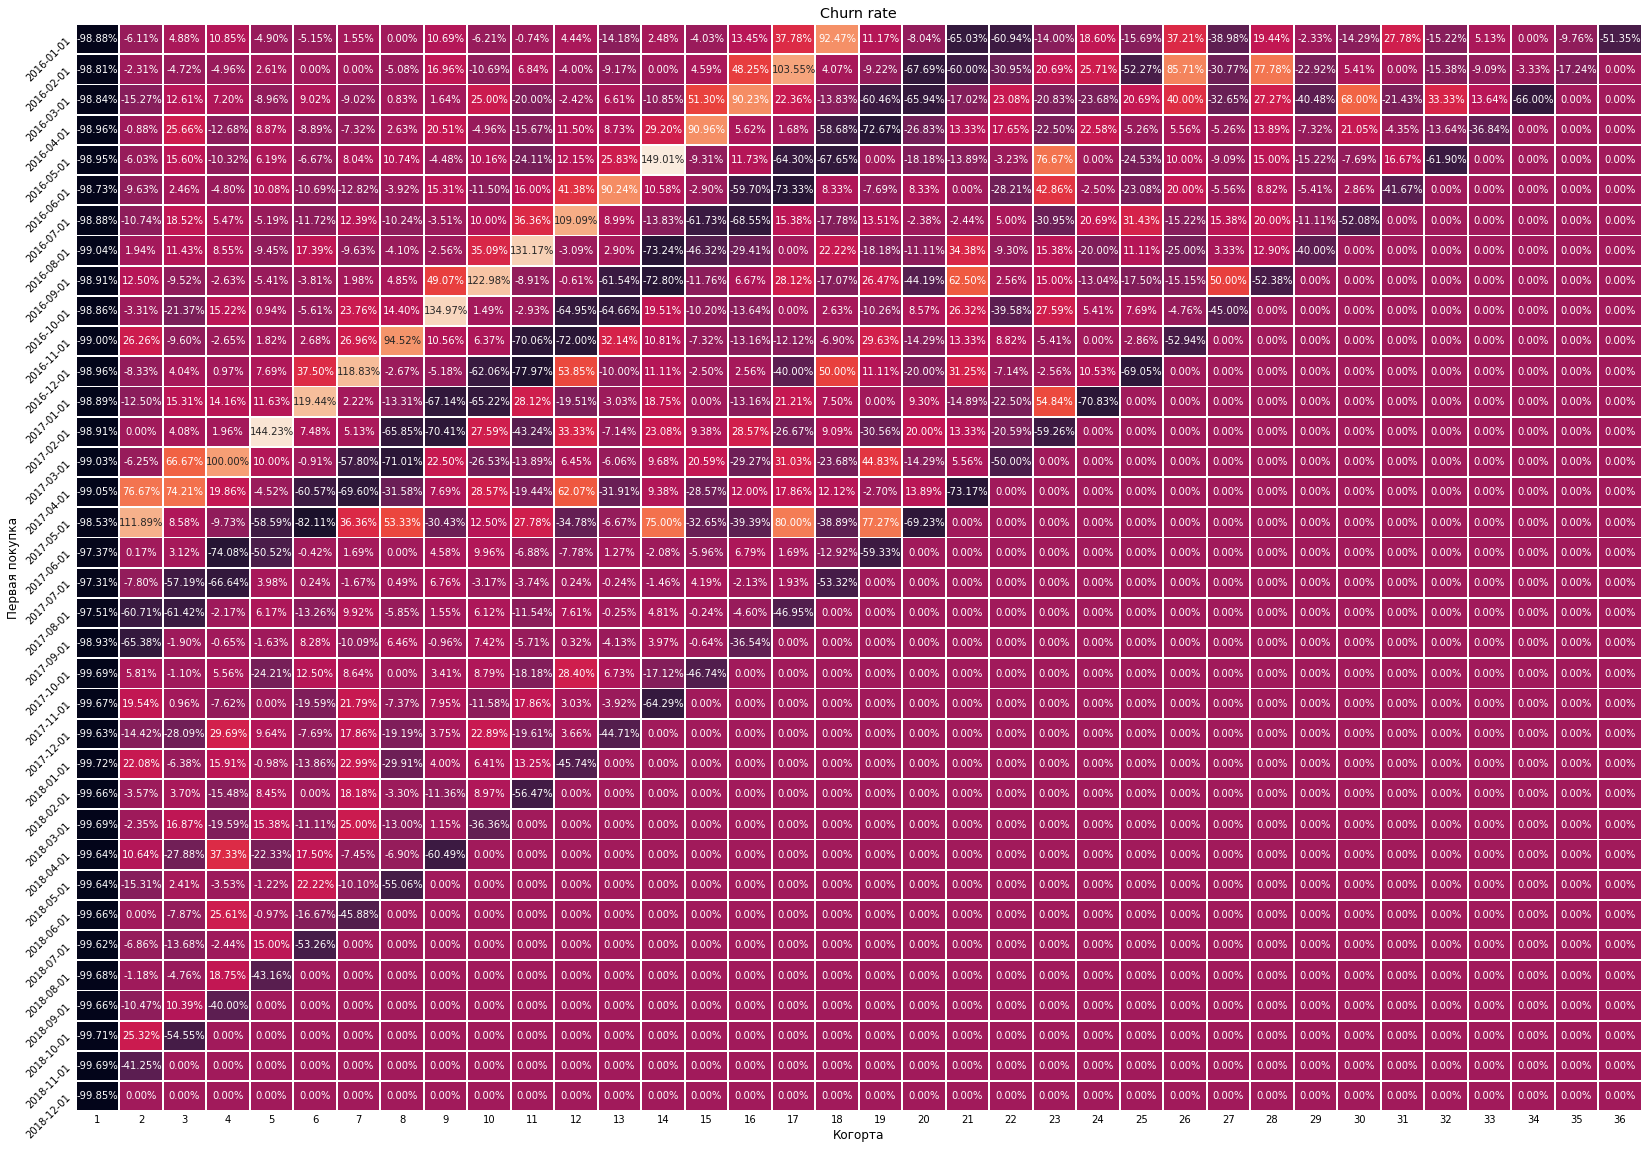

In [29]:
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(pivot_churn, annot=True, linewidths=1, fmt='.2%', cbar=False)
ax.set_xlabel('Когорта')
ax.set_ylabel('Первая покупка')
x_dates = pivot_churn.index.strftime('%Y-%m-%d').sort_values().unique()
ax.set_yticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_title('Churn rate')
plt.show()